<h1>handwashing project<h1>

In [1]:
import pandas as pd
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## number of deaths

In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
clinic_1 = yearly.iloc[0:6]
clinic_2 = yearly.iloc[6:12]
print(clinic_1)
print(clinic_2)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


## Death at the clinics


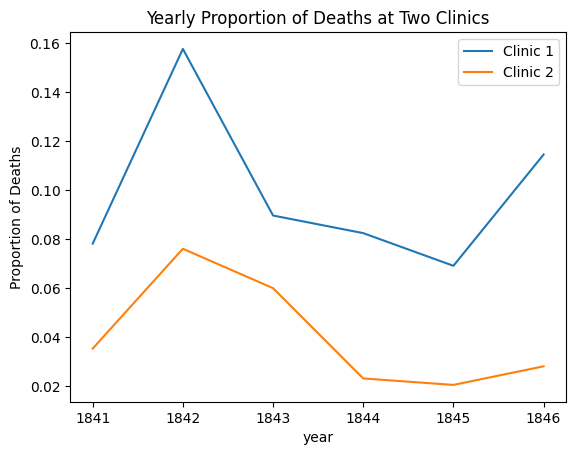

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion of Deaths")
plt.title("Yearly Proportion of Deaths at Two Clinics")
plt.legend()
plt.show()

## handwashing begins

In [4]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('monthly_deaths.csv',parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths']/monthly['births']
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## The effect of handwashing


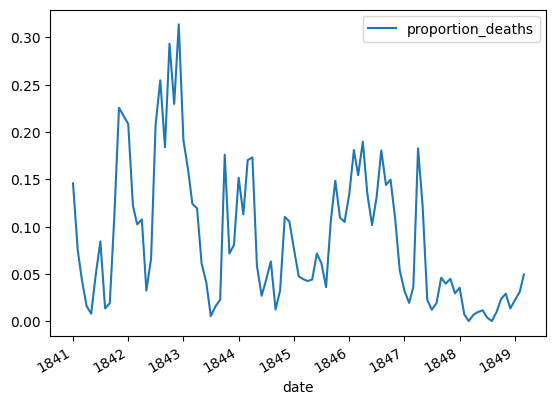

In [5]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths')

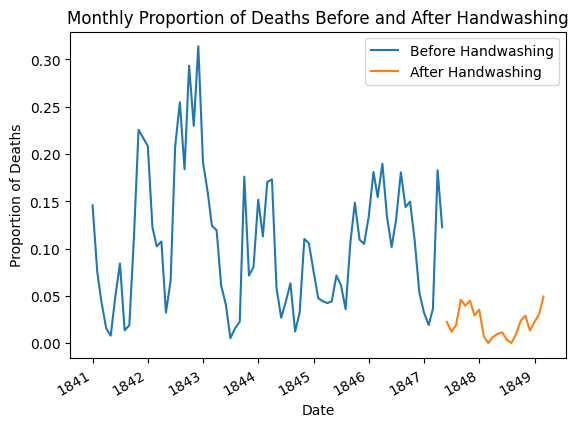

In [6]:
# Date when handwashing began
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="Before Handwashing")
after_washing.plot(x="date", y="proportion_deaths", label="After Handwashing", ax=ax)

# Customizing the plot
ax.set_ylabel("Proportion of Deaths")
ax.set_xlabel("Date")
plt.title("Monthly Proportion of Deaths Before and After Handwashing")
plt.legend()
plt.show()


In [7]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()

# Making the output more readable
mean_diff_rounded = round(mean_diff, 4)
print(f"The difference in the mean monthly proportion of deaths before and after handwashing was implemented is {mean_diff_rounded:.4f}.")

The difference in the mean monthly proportion of deaths before and after handwashing was implemented is -0.0840.


## A Bootstrap analysis 

In [8]:
# A bootstrap analysis of the reduction of deaths due to handwashing 
boot_mean_diff = [] 
for i in range(3000): 
    boot_before = before_proportion.sample(frac=1, replace=True) 
    boot_after = after_proportion.sample(frac=1, replace=True) 
    boot_mean_diff.append(boot_after.mean() - boot_before.mean()) 
# Calculating a 95% confidence interval from boot_mean_diff
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975]) 
confidence_interval

0.025   -0.101621
0.975   -0.067694
dtype: float64